importing the libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Analysis



In [2]:
#loading the dataset from a csv file to a pandas dataframe
df=pd.read_csv("Advertising.csv")

In [6]:
df.head(11)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [11]:
#number of data points and features
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [13]:
#checking for missing values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Analysis

In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Numerical Features

In [15]:
sns.set()

C:\Users\91808\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


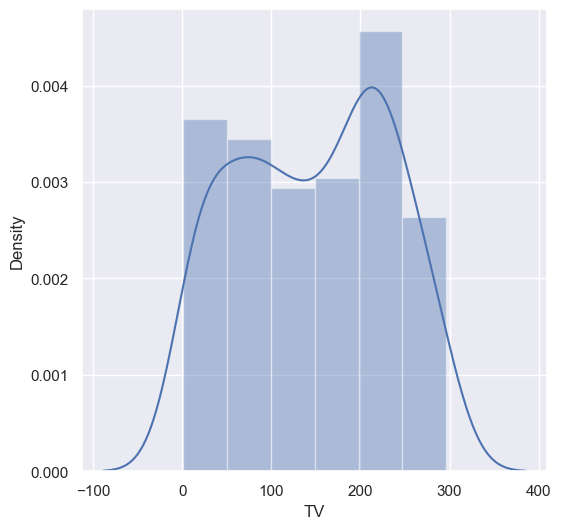

In [18]:
#item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['TV'])
plt.show()

C:\Users\91808\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


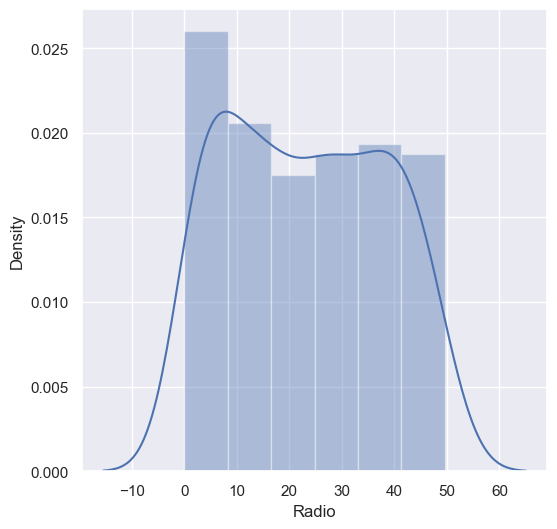

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(df['Radio'])
plt.show()

C:\Users\91808\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


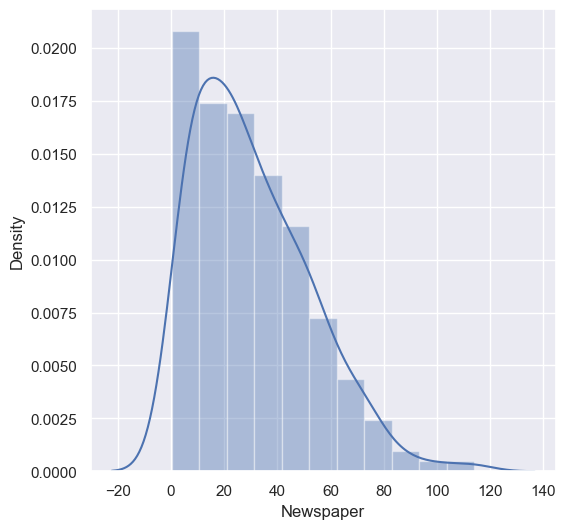

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df['Newspaper'])
plt.show()

C:\Users\91808\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


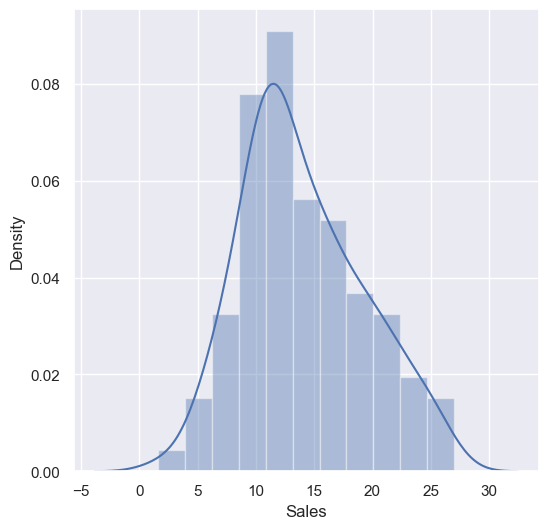

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'])
plt.show()

Splitiing features and Target

In [25]:
x=df.drop(columns='Sales',axis=1)
y=df['Sales']

In [26]:
print(x)

     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]


In [27]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Splitting Data Into Training Data And Testing Data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(200, 4) (160, 4) (40, 4)


Machine Learning Model Training

XGBoost Regressor

In [30]:
regressor=XGBRegressor()

In [31]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [32]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)

In [33]:
#R Squared Value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [35]:
print('R Squared Value',r2_train*100)

R Squared Value 99.99999426724752


In [40]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [41]:
r2_test=metrics.r2_score(y_test,test_data_prediction)

In [42]:
print('R Squared Value',r2_test*100)

R Squared Value 94.33277775612338
